In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=10)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=10)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['punta arenas', 'albany', 'jamestown', 'kapaa', 'busselton', 'georgetown', 'hermanus', 'college', 'faya', 'tura']


In [3]:
# Save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query url and request results
query_url = f"{url}appid={weather_api_key}&units={units}&q=" 
# Set temperature from response
temp = []
humidity = []
cloudiness = []
wind_speed = []
# Create for loop for temperatures in city list
for city in cities:    
    response = requests.get(query_url + city).json()
    temp.append(response['main']['temp'])
    humidity.append(response['main']['humidity'])
    cloudiness.append(response['clouds']['all'])
    wind_speed.append(response['wind']['speed'])
    print(f"The temperature in {city} is {temp} C.")


The temperature in punta arenas is [42.91] C.
The temperature in albany is [42.91, 79.34] C.
The temperature in jamestown is [42.91, 79.34, 71.11] C.
The temperature in kapaa is [42.91, 79.34, 71.11, 78.46] C.
The temperature in busselton is [42.91, 79.34, 71.11, 78.46, 54.05] C.
The temperature in georgetown is [42.91, 79.34, 71.11, 78.46, 54.05, 81.79] C.
The temperature in hermanus is [42.91, 79.34, 71.11, 78.46, 54.05, 81.79, 52.9] C.
The temperature in college is [42.91, 79.34, 71.11, 78.46, 54.05, 81.79, 52.9, 60.51] C.
The temperature in faya is [42.91, 79.34, 71.11, 78.46, 54.05, 81.79, 52.9, 60.51, 66.72] C.
The temperature in tura is [42.91, 79.34, 71.11, 78.46, 54.05, 81.79, 52.9, 60.51, 66.72, 75.06] C.


In [4]:
cities_df = pd.DataFrame({'Cities': cities, 'Latitude': lats, 'Longitude': lngs, 'Temperature': temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': wind_speed})
cities_df

,Cities,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,punta arenas,-80.378791,-91.716926,42.91,70,75,19.57
1,albany,-64.457977,117.689438,79.34,47,83,4.00
2,jamestown,-18.027856,-14.865743,71.11,85,90,5.01
3,kapaa,23.763959,-171.837716,78.46,84,90,4.00
4,busselton,-73.916632,94.103088,54.05,68,98,16.08
5,georgetown,-9.545368,-17.880334,81.79,88,20,1.01
6,hermanus,-79.088622,3.523819,52.90,57,13,4.79
7,college,75.012109,-145.891526,60.51,80,75,10.36
8,faya,19.121227,16.723542,66.72,69,67,3.78
9,tura,64.663713,98.136672,75.06,95,95,4.09


Text(0, 0.5, 'Temperature')

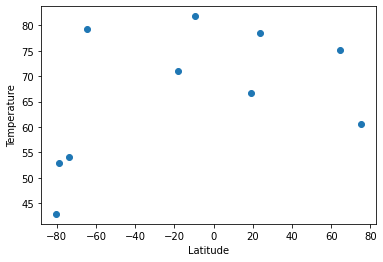

In [5]:
# Temperature (F) vs. Latitude
plt.scatter(cities_df['Latitude'], cities_df['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')

Text(0, 0.5, 'Humidity')

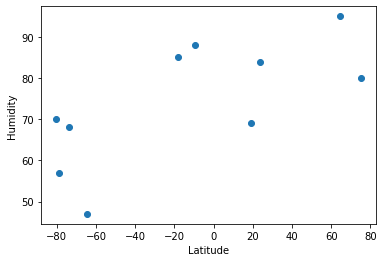

In [6]:
# Humidity (%) vs Latitude
plt.scatter(cities_df['Latitude'], cities_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')

Text(0, 0.5, 'Cloudiness')

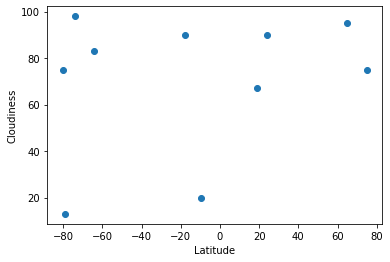

In [7]:
# Cloudiness (%) vs Latitude
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

Text(0, 0.5, 'Wind Speed')

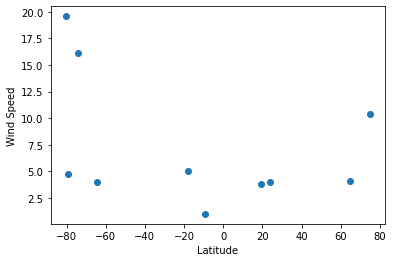

In [8]:
# Wind Speed (mph) vs. Latitude
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

In [ ]:
# Temperature (F) vs. Latitude
plt.scatter(cities_df['Latitude'], cities_df['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')

In [19]:
x_values = cities_df.groupby['Latitude'] < 0
plt.scatter(x_values, cities_df['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')

TypeError: 'method' object is not subscriptable